In [1]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import cv2
from numpy import linalg as LA
from sklearn.decomposition import PCA

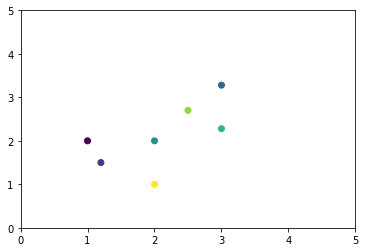

In [2]:
#####Generate sample data#####
data = np.array([[1,2],[1.2,1.5],[3,3.28],[2,2],[3,2.28],[2.5,2.7],[2,1]])
x1,x2,y1,y2 = pyplot.axis()
c = np.arange(len(data))
pyplot.axis((0,5,0,5))
pyplot.scatter(data[:,0], data[:,1],c=c)

[[-1.1        -0.10857143]
 [-0.9        -0.60857143]
 [ 0.9         1.17142857]
 [-0.1        -0.10857143]
 [ 0.9         0.17142857]
 [ 0.4         0.59142857]
 [-0.1        -1.10857143]]
mean
[2.1        2.10857143]
co_var:
[[0.54571429 0.31914286]
 [0.31914286 0.48204082]]
eig_vec:
[[ 0.74137181  0.67109451]
 [-0.67109451  0.74137181]]


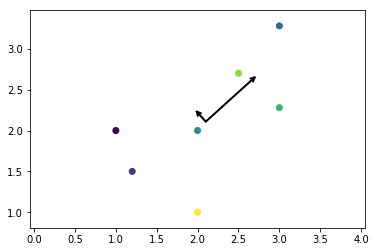

In [3]:
########################
##### Compute PCA ######
########################

def draw_vector(v0, v1, ax=None):
    ax = ax or pyplot.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
#1. compute mean
mean =  np.average(data,0)

#2. translate the centroid of the data to the origin
data_avg = data - mean

#3. Compute the covariance matrix of the data
co_var =  np.dot(data_avg.T,data_avg)/data_avg.shape[0]

#4. Compute the eigen vectors (and eigen value) of the covariance matrix 
#    (this is equivalent to computing an axis along which the variance of the data becomes maximum)
#     http://yusuke-ujitoko.hatenablog.com/entry/2017/03/04/193628
eig_value, eig_vec = LA.eig(co_var)
eig_vec = eig_vec.T

x1,x2,y1,y2 = pyplot.axis()
pyplot.axis((0,5,0,5))
pyplot.scatter(data[:,0], data[:,1],c=c)

#Draw the eigen vectors
draw_vector(mean, mean + eig_vec[0]*eig_value[0])
draw_vector(mean, mean + eig_vec[1]*eig_value[1])
pyplot.axis('equal');
print data_avg
print 'mean'
print mean
print 'co_var:'
print co_var
print 'eig_vec:'
print eig_vec

[-0.88837068 -1.07564357  1.45337391 -0.14699887  0.7822794   0.69345319
 -0.81809338]


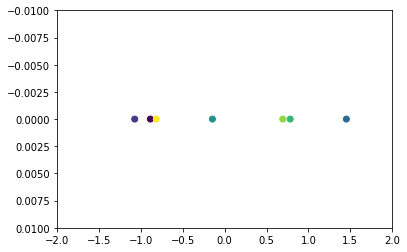

In [11]:
def projection(axis,data):
    return np.dot(axis,data.T)

#Project the data onto the first principal component
proj = projection(eig_vec[0],data_avg)
print proj
pyplot.axis((-2,2,0.01,-0.01))
pyplot.scatter(proj, np.zeros(len(proj)),c=c)

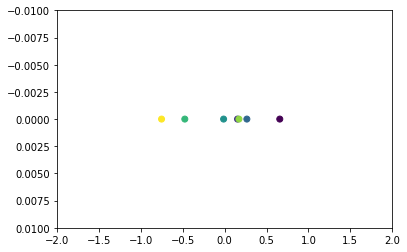

In [5]:
#Project the data onto the second principal component
proj2 = projection(eig_vec[1],data_avg)
pyplot.axis((-2,2,0.01,-0.01))
pyplot.scatter(proj2, np.zeros(len(proj2)),c=c)